# PYTHON CALENDAR HEATMAPS

Calendar heatmaps can be a good way to visualize data trends and patterns by day for a year or several years and provide an overview of the data.

# DOCUMENTATION

### For more information and documentation, visit python package index and search for calmap and calplot.

calmap and calplot are similar

calplot is a fork of calmap with the addition of arguments colorbar, dropzero, figsize, suptitle and yearcolor

# IMPORTS

In [192]:
import calmap
import calplot
import pandas as pd
from vega_datasets import data as vds
import matplotlib.pyplot as plt

# BASIC EXAMPLE

In [193]:
# data argument for plot is pandas series and must be indexed by a DatetimeIndex
heatmap_series = pd.Series(data=np.random.rand(366), 
                           index=pd.date_range(start='1-1-16', end='12-31-16'))
heatmap_series.head()

2016-01-01    0.887960
2016-01-02    0.994820
2016-01-03    0.308605
2016-01-04    0.340010
2016-01-05    0.655603
Freq: D, dtype: float64

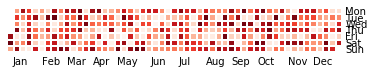

In [194]:
# calendar heatmap
calmap.yearplot(data=heatmap_series);

# CALENDAR HEATMAP FOR ONE YEAR

In [195]:
# data
data = 'https://raw.githubusercontent.com/groundhogday321/dataframe-datasets/master/jacksonville_florida_weather.csv'
jacksonville_df = pd.read_csv(data)

# convert date to datetime if needed
jacksonville_df['Date'] = pd.to_datetime(jacksonville_df['Date'])

# set index to date
jacksonville_df = jacksonville_df.set_index('Date')

# preview data
jacksonville_df.head(2)

,State,City,Year,Month_Short,Month_Long,Month_Number,Day,Max_Temp_Fahrenheit,Avg_Temp_Fahrenheit,Min_Temp_Fahrenheit,...,Max_Humidity_%,Avg_Humidity_%,Min_Humidity_%,Max_Wind_Speed_MPH,Avg_Wind_Speed_MPH,Min_Wind_Speed_MPH,Max_Pressure_Hg,Avg_Pressure_Hg,Min_Pressure_Hg,Precipitation_Inches
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,Florida,Jacksonville,2017,Jan,January,1,1,79,66.8,53,...,97,77.3,50,16,8.5,0,30.2,30.1,30.1,0.0
2017-01-02,Florida,Jacksonville,2017,Jan,January,1,2,81,70.8,60,...,100,87.6,58,14,7.8,3,30.2,30.1,30.0,0.0


In [175]:
# test if DatetimeIndex
isinstance(jacksonville_df.index, pd.DatetimeIndex)
# jacksonville_df.index

True

In [176]:
# data argument for plot is pandas series and must be indexed by a DatetimeIndex
precipitation = pd.Series(jacksonville_df.Precipitation_Inches)
precipitation.head()

Date
2017-01-01    0.00
2017-01-02    0.00
2017-01-03    1.28
2017-01-04    0.19
2017-01-05    0.00
Name: Precipitation_Inches, dtype: float64

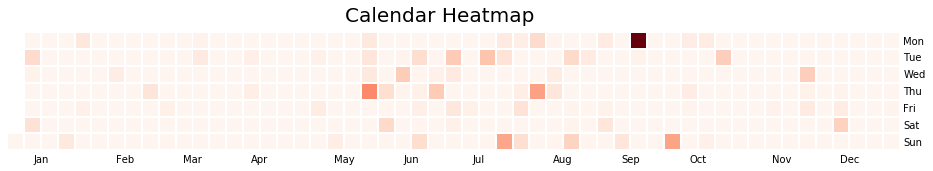

In [255]:
# calendar heatmap
plt.figure(figsize=(16,8))
calmap.yearplot(data=precipitation, year=2017);
plt.suptitle('Calendar Heatmap', y=.65, fontsize=20);

# CALENDAR HEATMAP FOR SEVERAL YEARS

In [170]:
# data argument for plot is pandas series and must be indexed by a DatetimeIndex
avg_temp = pd.Series(jacksonville_df.Avg_Temp_Fahrenheit)
avg_temp.head()

Date
2017-01-01    66.8
2017-01-02    70.8
2017-01-03    68.8
2017-01-04    62.0
2017-01-05    57.4
Name: Avg_Temp_Fahrenheit, dtype: float64

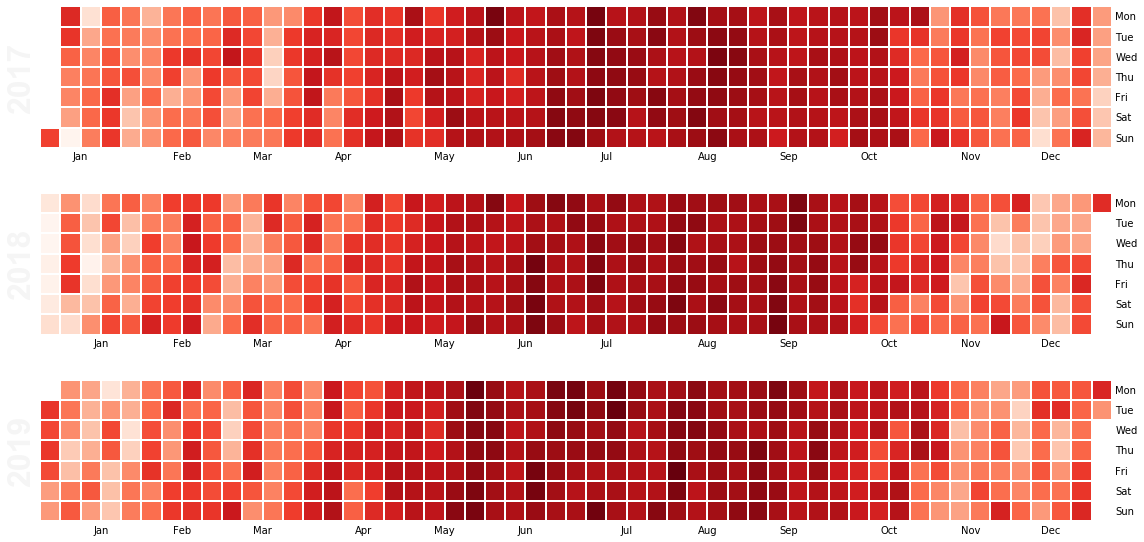

In [250]:
# calendar heatmap
calmap.calendarplot(data=avg_temp, fig_kws=dict(figsize=(16,8)));

### example using calplot

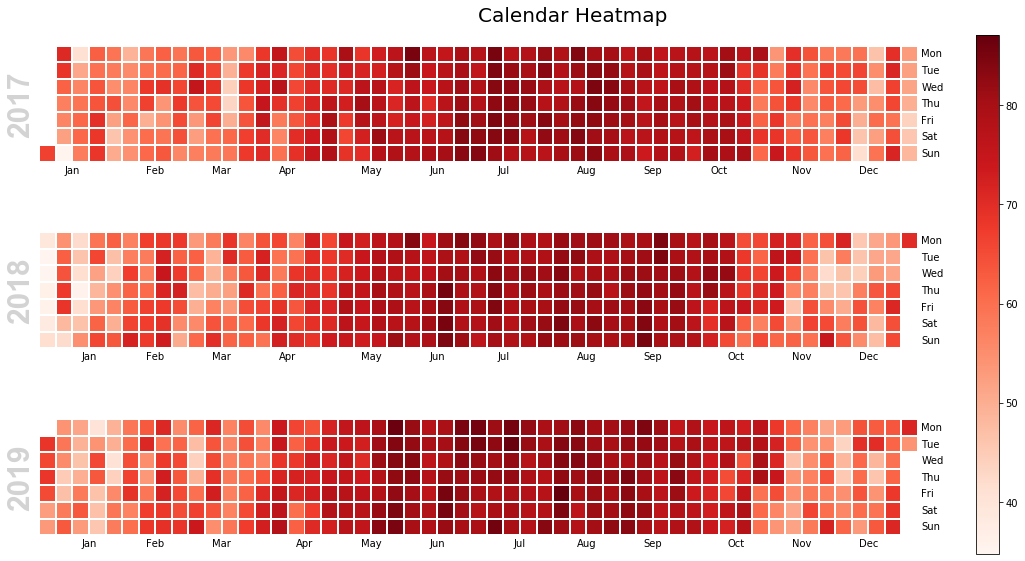

In [196]:
# calendar heatmap
# notice the colorbar is added automatically
calplot.calplot(data=avg_temp, cmap='Reds', figsize=(16,8));
plt.suptitle('Calendar Heatmap', y=1.0, fontsize=20);

# EXTRA EXAMPLE WITH CALPLOT
example uses resample to put data in proper form

In [247]:
# temperatures in San Francisco
# data argument for plot is pandas series and must be indexed by a DatetimeIndex
sf_temps = vds.sf_temps()
sf_temps = sf_temps.set_index('date')
# temp resample data by day
temps = pd.Series(sf_temps.resample('D').max().temp)
temps.head()

date
2010-01-01    53.3
2010-01-02    53.4
2010-01-03    53.5
2010-01-04    53.6
2010-01-05    53.8
Freq: D, Name: temp, dtype: float64

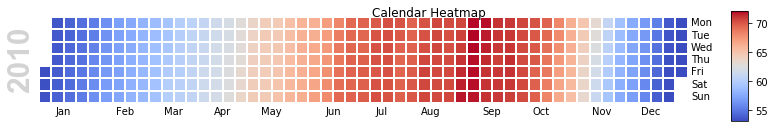

In [248]:
# calendar heatmap
calplot.calplot(data=temps, cmap='coolwarm', suptitle='Calendar Heatmap');